Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


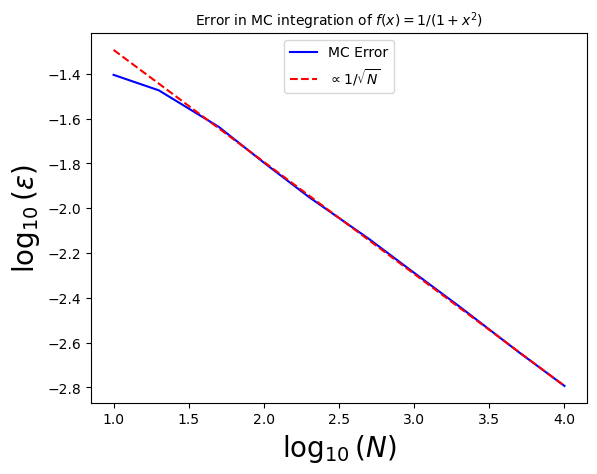

In [1]:
import math
import random # we need random numbers for the Monte Carlo method!

# Let's define a function that performs one-dimensional MC integration of an arbitrary for N points
# We'll also make it capable of performing the integration in an interval a,b
def mcint(func, a, b, N):
    """Calculates the one-dimensional Monte Carlo integral of func in [a,b] for N points"""
    sumf = 0 # we will use this variable for the sum of f(x_i)
    sumfsq = 0 # and this one for the sum of f(x_i)^2, used in the error calculation
    for i in range(int(N)):
        xi = (b-a) * random.random() + a
        sumf = sumf + func(xi)
        sumfsq = sumfsq + func(xi)**2 
    # now calculate the average value of f (i.e. the integral):
    I = sumf/N
    # and the error: 
    sigmaIsq = (1/N) * ( (1/N) * sumfsq - I**2 ) # this is the variance (i.e. the error squared)
    sigmaI = math.sqrt(sigmaIsq) # this is the actual error
    return I, sigmaI # return the integral and its error

# Now let's also define the function that we wish to integrate:
def f(x):
    return 1/(1+x**2)

# The array of the number of points to integrate over:
Narray = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
Intarray = []
Errarray = []

for N in Narray:
    Int, Err = mcint(f,0,1,N) # this way you can access both the integral and its error
    Intarray.append(Int)
    Errarray.append(Err)

# Now let's plot! 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# Now plot! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$\log_{10}(N)$', fontsize=20) # set the x label
ax.set_ylabel(r'$\log_{10}(\varepsilon)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'Error in MC integration of $f(x)=1/(1+x^2)$', fontsize=10) # set the title 

# make a one-dimensional plot:
ax.plot(np.log10(Narray), np.log10(Errarray), label='MC Error', ls='-', color='blue') 

# check if this agrees with a line with slope -1/2 (on the log-log plot):
ax.plot(np.log10(Narray), np.log10(Errarray)[-1] +(1/2) * np.log10(Narray)[-1] + (-1/2)*np.log10(Narray), label=r'$\propto 1/\sqrt{N}$', ls='--', color='red')

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here
